# Heart Failure Prediction

## Introduction

### Goal

<p>Creating a model to predict if a patient has heart disease or not.</p>

### Context
<p>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.</p>

<p>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.</p>

### Attribute Information
<ol>
<li>Age: age of the patient [years]</li>
<li>Sex: sex of the patient [M: Male, F: Female]</li>
<li>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
<li>RestingBP: resting blood pressure [mm Hg]</li>
<li>Cholesterol: serum cholesterol [mm/dl]</li>
<li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
<li>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
<li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
<li>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</li>
<li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
<li>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
<li>HeartDisease: output class [1: heart disease, 0: Normal]</li>
</ol>

## Libraries

In [292]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
sns.set_style("white")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import exp

## Overview of dataset

In [2]:
data = pd.read_csv(r'heart.csv', sep = ',', encoding = 'utf-8-sig')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dataset contains 918 observations and 12 variables, where none of them have missing variables.

In [5]:
data.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


#### Sex and Age

In [6]:
age = pd.cut(data['Age'], bins = [data['Age'].min(), 40, 60, data['Age'].max()], labels = ['{0} - 40'.format(data['Age'].min()), '40 - 60', '60 - {}'.format(data['Age'].max())]).value_counts().sort_index()
print('Pacients broken down by Sex\n{0}'.format(data['Sex'].value_counts()))
print('\nPacients broken down by Age\n{0}'.format(age))

Pacients broken down by Sex
M    725
F    193
Name: Sex, dtype: int64

Pacients broken down by Age
28 - 40     92
40 - 60    604
60 - 77    221
Name: Age, dtype: int64


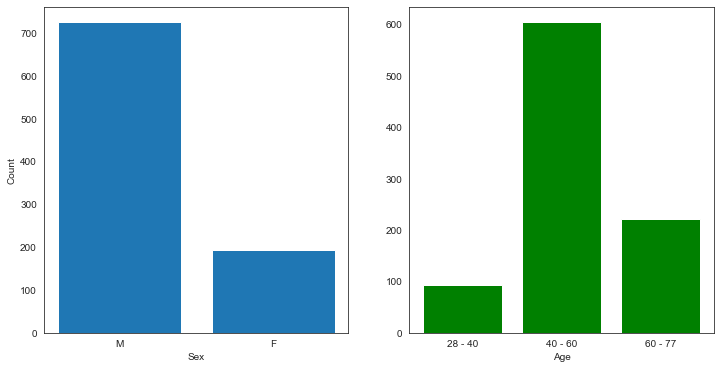

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].bar(list(data['Sex'].unique()),data['Sex'].value_counts())
ax[1].bar(age.index,age, color = 'green')

ax[0].set_xlabel('Sex')
ax[1].set_xlabel('Age')
ax[0].set_ylabel('Count')

plt.show()

In [8]:
pd.DataFrame(data.groupby(['HeartDisease','Sex'])['Sex'].count())

Sex
HeartDisease Sex     
0            F    143
             M    267
1            F     50
             M    458

In [9]:
age_sex = data[['Sex','Age','HeartDisease']]
age_sex['Age'] = pd.cut(age_sex['Age'], bins = [age_sex['Age'].min(), 40, 60, age_sex['Age'].max()], labels = ['{0} - 40'.format(age_sex['Age'].min()), '40 - 60', '60 - {}'.format(age_sex['Age'].max())])

/var/folders/wj/shthrvws4t12jrl47m5rjcx00000gn/T/ipykernel_50323/3876190843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_sex['Age'] = pd.cut(age_sex['Age'], bins = [age_sex['Age'].min(), 40, 60, age_sex['Age'].max()], labels = ['{0} - 40'.format(age_sex['Age'].min()), '40 - 60', '60 - {}'.format(age_sex['Age'].max())])


In [10]:
pd.DataFrame(age_sex.groupby(['HeartDisease','Sex','Age'])['Age'].count())

Age
HeartDisease Sex Age         
0            F   28 - 40   16
                 40 - 60  101
                 60 - 77   26
             M   28 - 40   44
                 40 - 60  188
                 60 - 77   34
1            F   28 - 40    4
                 40 - 60   27
                 60 - 77   19
             M   28 - 40   28
                 40 - 60  288
                 60 - 77  142

Dataset contains 725 mens and 193 womens, where 458 of men and just 50 women have HeartDisease.<br>
Looking at patients with heart disease can be seen that 87% of them are men aged between 40 - 60 years old (288).<br>
Among women also there are slittly more with heart disease in age 40 - 60 years old.

### Chest pain type

In [11]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

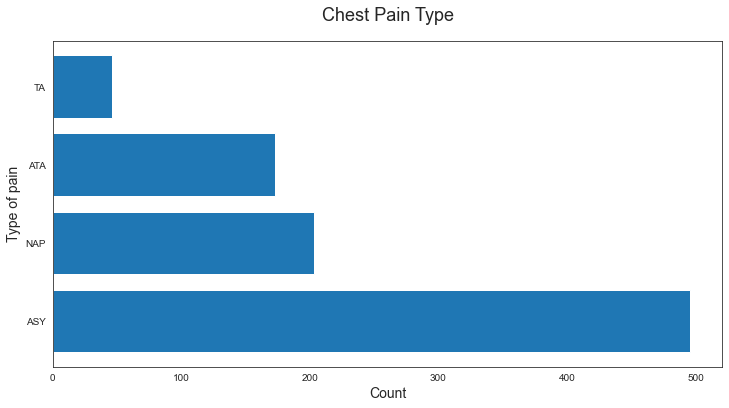

In [12]:
plt.figure(figsize=(12,6))
plt.barh(list(data['ChestPainType'].value_counts().index), list(data['ChestPainType'].value_counts()))
plt.title('Chest Pain Type', fontsize = 18, pad = 20)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Type of pain', fontsize = 14)
plt.margins(0.05)
plt.show()

In [13]:
pd.DataFrame(data.groupby(['ChestPainType','HeartDisease'])['ChestPainType'].count())

ChestPainType
ChestPainType HeartDisease               
ASY           0                       104
              1                       392
ATA           0                       149
              1                        24
NAP           0                       131
              1                        72
TA            0                        26
              1                        20

Neerly 400 people has heart disease with asymptotic chest pain type which also is the most commoc among all types.<br>
Looking at pacients with atypical angina there are only 17% of them with heart disease.<br>

### Resting BP

In [14]:
pd.DataFrame(data['RestingBP'].describe().round(2))

,RestingBP
count,918.00
mean,132.40
std,18.51
min,0.00
25%,120.00
50%,130.00
75%,140.00
max,200.00


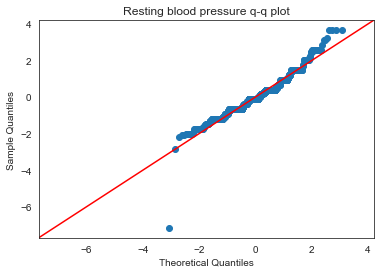

In [15]:
sm.qqplot(data['RestingBP'], fit = True, line = '45')
plt.title('Resting blood pressure q-q plot')
plt.show()

Minimum resting blood pressure is 0, which is an outlier and whole observation will be removed from dataset.<br>
Moreover 75% of observations has resting blood pressure less than 140 mmHG.

In [16]:
data.groupby(['HeartDisease'])['RestingBP'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,130.180488,16.499585,80.0,120.0,130.0,140.0,190.0
1,508.0,134.185039,19.828685,0.0,120.0,132.0,145.0,200.0


75% of patients with heart disease has resting blood pressure less then 145 mmHG, while ones without heart disease has bp less then 140 mmHG.<br>
So diffrence between people with heartdisease is small.

### Cholesterol

In [17]:
pd.DataFrame(data['Cholesterol'].describe().round(2))

,Cholesterol
count,918.00
mean,198.80
std,109.38
min,0.00
25%,173.25
50%,223.00
75%,267.00
max,603.00


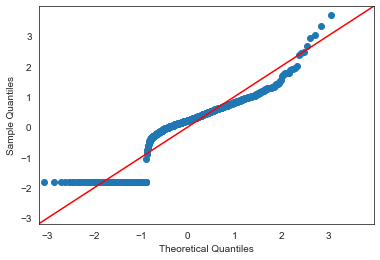

In [18]:
sm.qqplot(data['Cholesterol'], line = '45', fit = True)
plt.show()

<h5 style="color:#33b5e5">CHECK IF CHOLESTEROL EQUEL 0 IS AN OUTLIER OR NOT AND MAKE DECISION TO REMOVE THESE OBSERVATIONS</h5>

### FastingBS

In [19]:
pd.DataFrame(data['FastingBS'].value_counts())

,FastingBS
0,704
1,214


In [20]:
pd.DataFrame(data.groupby(['FastingBS','HeartDisease'])['FastingBS'].count())

FastingBS
FastingBS HeartDisease           
0         0                   366
          1                   338
1         0                    44
          1                   170

Only 214 people have fasting blood pressure more than 120 mg/dl, while 80% of them has heart disease.</br>
On the other hand nearly 50% of people with fasting bs lower than 120 mg/dl has heart disease.

### RestingECG

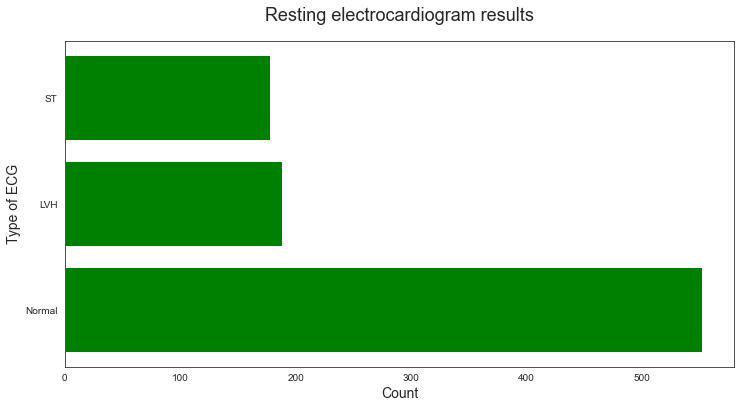

In [21]:
plt.figure(figsize=(12,6))
plt.barh(list(data['RestingECG'].value_counts().index), list(data['RestingECG'].value_counts()), color='green')
plt.title('Resting electrocardiogram results', fontsize = 18, pad = 20)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Type of ECG', fontsize = 14)
plt.margins(0.05)
plt.show()

In [22]:
pd.DataFrame(data.groupby(['HeartDisease','RestingECG'])['RestingECG'].count())

RestingECG
HeartDisease RestingECG            
0            LVH                 82
             Normal             267
             ST                  61
1            LVH                106
             Normal             285
             ST                 117

The most common rest ECG obtained was "Normal". Up to 60% of cases.<br>

### MaxHR

In [23]:
pd.DataFrame(data['MaxHR'].describe().round(2))

,MaxHR
count,918.00
mean,136.81
std,25.46
min,60.00
25%,120.00
50%,138.00
75%,156.00
max,202.00


### ExerciseAngina

In [24]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [25]:
pd.DataFrame(data.groupby(['HeartDisease','ExerciseAngina'])['ExerciseAngina'].count())

ExerciseAngina
HeartDisease ExerciseAngina                
0            N                          355
             Y                           55
1            N                          192
             Y                          316

### Oldpeak 

In [26]:
data['Oldpeak'].describe().round(2)

count    918.00
mean       0.89
std        1.07
min       -2.60
25%        0.00
50%        0.60
75%        1.50
max        6.20
Name: Oldpeak, dtype: float64

### ST_Slope

In [27]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

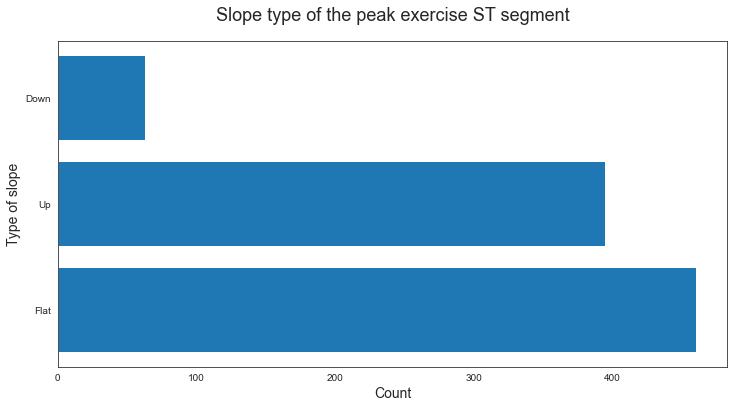

In [28]:
plt.figure(figsize=(12,6))
plt.barh(list(data['ST_Slope'].value_counts().index), list(data['ST_Slope'].value_counts()))
plt.title('Slope type of the peak exercise ST segment', fontsize = 18, pad = 20)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Type of slope', fontsize = 14)
plt.margins(0.05)
plt.show()

In [29]:
data = data[data['RestingBP'] != 0]

## Correlation

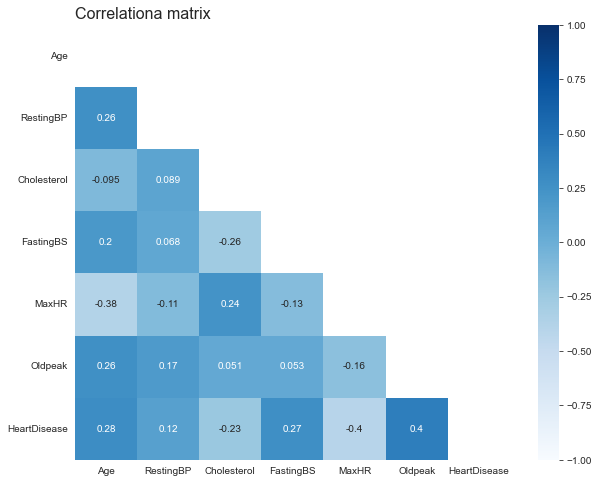

In [30]:
plt.figure(figsize = (10,8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(), vmax=1, vmin = -1,  square=True, cmap = 'Blues', annot=True, mask = mask)
plt.title('Correlationa matrix', fontsize = 16, loc = 'left')
plt.yticks(rotation=0)
plt.show()

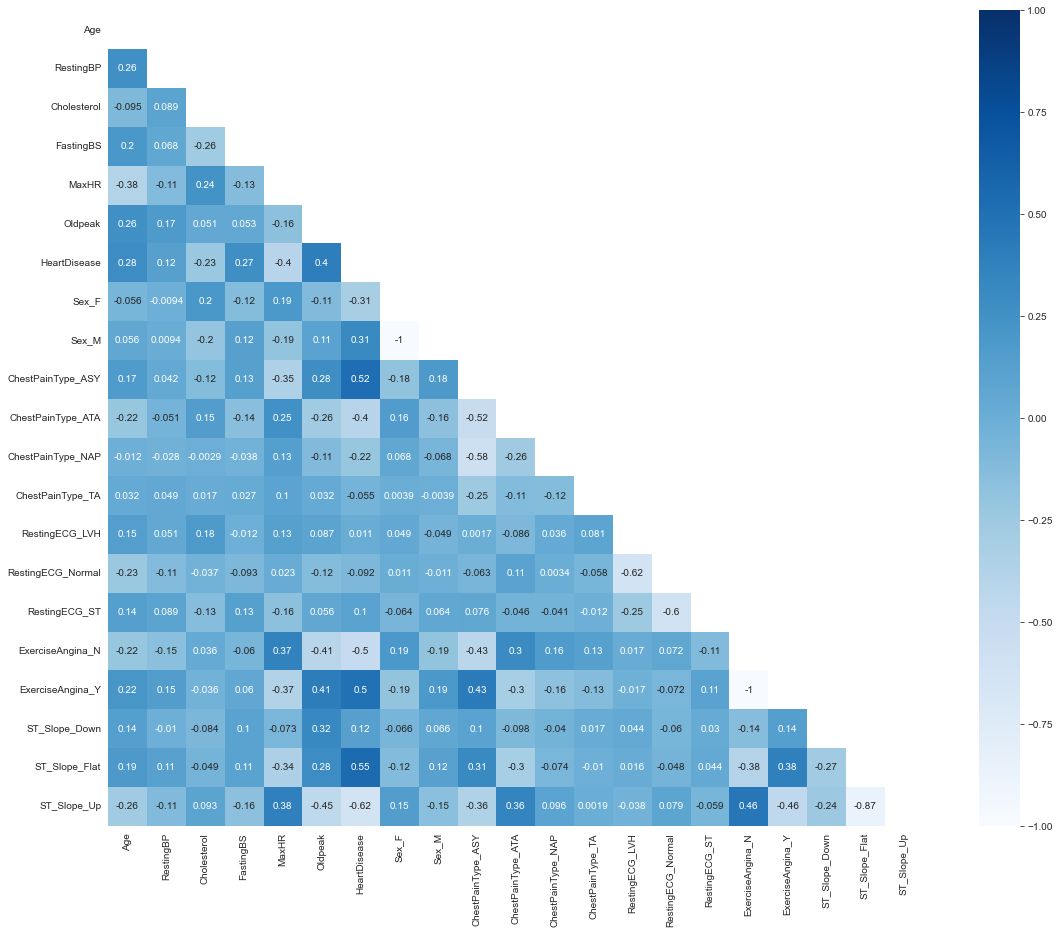

In [31]:
plt.figure(figsize = (20,15))
mask = np.triu(np.ones_like(pd.get_dummies(data).corr()))
sns.heatmap(pd.get_dummies(data).corr(), vmax=1, vmin = -1,  square=True, cmap = 'Blues', annot=True, mask = mask)
plt.show()

Correlation between variables is moderate to low.<br>
Highest correlation occures between HeartDisease and ST_Slope_Flat

## Data preprocessing

There will be created copy dataset where each continues variable will be categorized based on quanitles and other known classifications.<br>
<br>
Categories after classification:
<ul>
<li>Age</li>
    <ul>
        <li>young age - less than 40 years old</li>
        <li>middle age - between 40 and 60 years old</li>
        <li>seniors - more than 60 years old</li>
    </ul>
<li>RestingBP</li>
    <ul>
        <li>Nornal - less than 120 mmHG</li>
        <li>Optimal - between 120 and 140 mmHG</li>
        <li>High - more than 140 mmHG</li>
    </ul>
<li>Cholesterol</li>
    <ul>
        <li>Good - less than 200 mm/dl</li>
        <li>Middle - high  - between 200 and 240 mm/dl</li>
        <li>High -  more than 240 mm/dl</li>
    </ul>
<li>MaxHR</li>
    <ul>
        <li>low - less than value of 1st quantile</li>
        <li>mid - between value 1st and 3rd quantile</li>
        <li>high - more then value of 3rd quantile</li>
    </ul>
<li>Oldpeak</li>
    <ul>
        <li>low - less than value of 1st quantile</li>
        <li>mid - between value 1st and 3rd quantile</li>
        <li>high - more then value of 3rd quantile</li>
    </ul>
</ul>


In [32]:
dataCategorical = data.copy()

In [33]:
dataCategorical

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Age

In [34]:
dataCategorical['Age'] = pd.cut(data['Age'], bins = [data['Age'].min() - 1, 40, 60, data['Age'].max() + 1], labels = ['young age', 'middle age', 'seniors'])
dataCategorical['Age'].value_counts()

middle age    603
seniors       221
young age      93
Name: Age, dtype: int64

### RestingBP

In [35]:
dataCategorical['RestingBP'] = pd.cut(data['RestingBP'], bins = [data['RestingBP'].min()-1, 120, 140, data['RestingBP'].max() + 1], labels = ['Optimal', 'Normal', 'High'])
dataCategorical['RestingBP'].value_counts()

Normal     405
Optimal    292
High       220
Name: RestingBP, dtype: int64

### Cholesterol

In [36]:
dataCategorical['Cholesterol'] = pd.cut(data['Cholesterol'], bins = [data['Cholesterol'].min() - 1, 200, 240, data['Cholesterol'].max() + 1], labels = ['Good', 'Middle - high', 'High'])
dataCategorical['Cholesterol'].value_counts()

High             355
Good             321
Middle - high    241
Name: Cholesterol, dtype: int64

### MaxHR

In [37]:
dataCategorical['MaxHR'] = pd.cut(data['MaxHR'], bins = [data['MaxHR'].min() - 1, data['MaxHR'].quantile(0.25), data['MaxHR'].quantile(0.75), data['MaxHR'].max() + 1], labels = ['low', 'mid', 'high'])
dataCategorical['MaxHR'].value_counts()

mid     435
low     261
high    221
Name: MaxHR, dtype: int64

### Oldpeak

In [38]:
dataCategorical['Oldpeak'] = pd.cut(data['Oldpeak'], bins = [data['Oldpeak'].min() - 1, data['Oldpeak'].quantile(0.25), data['Oldpeak'].quantile(0.75), data['Oldpeak'].max() + 1], labels = ['low', 'mid', 'high'])
dataCategorical['Oldpeak'].value_counts()

low     381
mid     314
high    222
Name: Oldpeak, dtype: int64

## Split the data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['HeartDisease'], axis = 1), data['HeartDisease'], test_size=0.2, random_state=42)

In [40]:
train_data = pd.merge(x_train.reset_index(), y_train.reset_index(), how = 'left', on = 'index').drop('index', axis = 1)
test_data = pd.merge(x_test.reset_index(), y_test.reset_index(), how = 'left', on = 'index').drop('index', axis = 1)

In [41]:
x_cat_train, x_cat_test, y_cat_train, y_cat_test = train_test_split(dataCategorical.drop(['HeartDisease'], axis = 1), dataCategorical['HeartDisease'], test_size=0.2, random_state=42)

In [42]:
train_cat_data = pd.merge(x_cat_train.reset_index(), y_cat_train.reset_index(), how = 'left', on = 'index').drop('index', axis = 1)
test_cat_data = pd.merge(x_cat_test.reset_index(), y_cat_test.reset_index(), how = 'left', on = 'index').drop('index', axis = 1)

## Models
Due to Heart Disease being dychotomic models will be created using logit and probit function, where logit explaines chance of occurance while probit determines the likelihood that an item or event will fall into one of a range of categories by estimating the probability that observation with specific features will belong to a particular category.<br>
<br>
Each model will be used for each dataset

### Logit model with non categorized data

In [43]:
formula = 'HeartDisease ~ Age + Sex + ChestPainType + RestingBP + Cholesterol + FastingBS + RestingECG + MaxHR + ExerciseAngina + Oldpeak + ST_Slope'
logit_1 = smf.glm(formula = formula, data = train_data, family = sm.families.Binomial())
logit_1_results = logit_1.fit()
print(logit_1_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      717
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -234.01
Date:                Thu, 21 Jul 2022   Deviance:                       468.02
Time:                        16:07:25   Pearson chi2:                     668.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5237
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6574 

In [44]:
formula = "HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope"
logit_1 = smf.glm(formula = formula, data = train_data, family = sm.families.Binomial())
logit_1_results = logit_1.fit()
print(logit_1_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      722
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.24
Date:                Thu, 21 Jul 2022   Deviance:                       470.49
Time:                        16:07:26   Pearson chi2:                     705.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5221
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2514 

### Probit model with non categorized data

In [45]:
formula = 'HeartDisease ~ Age + Sex + ChestPainType + RestingBP + Cholesterol + FastingBS + RestingECG + MaxHR + ExerciseAngina + Oldpeak + ST_Slope'
probit_1 = smf.glm(formula = formula, data = train_data, family = sm.families.Binomial(link = sm.genmod.families.links.probit()))
probit_1_results =probit_1.fit()
print(probit_1_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      717
Model Family:                Binomial   Df Model:                           15
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.63
Date:                Thu, 21 Jul 2022   Deviance:                       467.26
Time:                        16:07:26   Pearson chi2:                     662.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5242
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3206 

In [46]:
formula = 'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope'
probit_1 = smf.glm(formula = formula, data = train_data, family = sm.families.Binomial(link = sm.genmod.families.links.probit()))
probit_1_results =probit_1.fit()
print(probit_1_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      722
Model Family:                Binomial   Df Model:                           10
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.47
Date:                Thu, 21 Jul 2022   Deviance:                       470.94
Time:                        16:07:26   Pearson chi2:                     713.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5218
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0339 

All variables are statisticly significance besides age, max heart rate, resting blood pressure and resting electrocardiogram results. These variables will be dropped from logit 1 model and probit 1 model.

### Logit model with categorized data

In [47]:
formula = 'HeartDisease ~ Age + Sex + ChestPainType + RestingBP + Cholesterol + FastingBS + RestingECG + MaxHR + ExerciseAngina + Oldpeak + ST_Slope'
logit_2 = smf.glm(formula = formula, data = train_cat_data, family = sm.families.Binomial())
logit_2_results = logit_2.fit()
print(logit_2_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.37
Date:                Thu, 21 Jul 2022   Deviance:                       466.74
Time:                        16:07:26   Pearson chi2:                     722.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5245
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [48]:
formula = 'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + C(Oldpeak, Treatment(reference = "high")) + ST_Slope'
logit_2 = smf.glm(formula = formula, data = train_cat_data, family = sm.families.Binomial())
logit_2_results = logit_2.fit()
print(logit_2_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      720
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.21
Date:                Thu, 21 Jul 2022   Deviance:                       472.41
Time:                        16:07:26   Pearson chi2:                     692.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5209
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#### Probit model with categorized data

In [49]:
formula = 'HeartDisease ~ Age + Sex + ChestPainType + RestingBP + Cholesterol + FastingBS + RestingECG + MaxHR + ExerciseAngina + Oldpeak + ST_Slope'
probit_2 = smf.glm(formula = formula, data = train_cat_data, family = sm.families.Binomial(link = sm.genmod.families.links.probit()))
probit_2_results = probit_2.fit()
print(probit_2_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                           20
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.77
Date:                Thu, 21 Jul 2022   Deviance:                       467.53
Time:                        16:07:26   Pearson chi2:                     740.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5240
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [50]:
formula = 'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + C(Oldpeak, Treatment(reference = "high")) + ST_Slope'
probit_2 = smf.glm(formula = formula, data = train_cat_data, family = sm.families.Binomial(link = sm.genmod.families.links.probit()))
probit_2_results = probit_2.fit()
print(probit_2_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                  733
Model:                            GLM   Df Residuals:                      720
Model Family:                Binomial   Df Model:                           12
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.21
Date:                Thu, 21 Jul 2022   Deviance:                       472.42
Time:                        16:07:26   Pearson chi2:                     707.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5208
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Model evaluation


### VIF (variance inflation factor)

Only VIF for logit models will be calculated, because data is the same for probit models.

In [233]:
def vif(model):
    variable = model.model.exog
    vif_res = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
    return pd.DataFrame({'Variable name':model.model.exog_names, 'VIF': vif_res})

In [238]:
non_categorized_data_vif = vif(logit_1_results)
non_categorized_data_vif

,Variable name,VIF
0,Intercept,32.046955
1,Sex[T.M],1.121425
2,ChestPainType[T.ATA],1.530180
3,ChestPainType[T.NAP],1.270828
4,ChestPainType[T.TA],1.093084
5,ExerciseAngina[T.Y],1.531889
6,ST_Slope[T.Flat],4.523134
7,ST_Slope[T.Up],5.497837
8,Cholesterol,1.160297
9,FastingBS,1.108991


In [239]:
categorized_data_vif = vif(logit_2_results)
categorized_data_vif

,Variable name,VIF
0,Intercept,27.602314
1,Sex[T.M],1.113869
2,ChestPainType[T.ATA],1.531509
3,ChestPainType[T.NAP],1.275354
4,ChestPainType[T.TA],1.097276
5,Cholesterol[T.Middle - high],1.377304
6,Cholesterol[T.High],1.423022
7,ExerciseAngina[T.Y],1.535896
8,"C(Oldpeak, Treatment(reference=""high""))[T.low]",2.228510
9,"C(Oldpeak, Treatment(reference=""high""))[T.mid]",1.671743


For both data types nearly all variables have vif less than 10, which indicates no  to little multicolinearity between them. 

### Log likelihood test

In [187]:
#Method to calculate lrtest
def lrtest(Y, X, link, data, type):
    #Creating dataframe with lr test statistics and p-values
    output = pd.DataFrame(columns = ['DF model full', 'LogLink', 'DF diff', 'Chisq', 'P-value'])

    if type == 1:
        #Creation of formulas list
        formula = Y + ' ~ '
        formulas_list = []
        for i in list(range(0,len(X))):
            if i == 0:
                formula = formula + X[i] 
            else: formula = formula + " + " + X[i]
            formulas_list.append(formula)
    elif type == 3:
        formula = Y + ' ~ '
        formulas_list = []

        for i in list(range(0,len(X))):
            X_new = X.drop(X[i])
            formula = Y + ' ~ '
            for i in list(range(0,len(X_new))):
                if i == 0:
                    formula = formula + X_new[i] 
                else: formula = formula + " + " + X_new[i]
            formulas_list.append(formula)

    #First model is one with 
    model_b = smf.glm(formula = formulas_list[0], data = data, family = sm.families.Binomial(link = link)).fit()

    output = pd.DataFrame(columns = ['Model number','DF', 'LogLink', 'DF diff', 'Chisq', 'P-value'])

    output = pd.concat([output, pd.DataFrame([{'Model number': 1,'DF': model_b.df_model, 'LogLink': model_b.llf, 'DF diff': '', 'Chisq': '', 'P-value': ''}])], ignore_index=True)

    for i in list(range(1, len(formulas_list))):
        model_f = smf.glm(formula = formulas_list[i], data = data, family = sm.families.Binomial(link = link)).fit()

        model_b_df = model_b.df_model
        model_f_df = model_f.df_model
        
        df_diff = model_f_df - model_b_df

        model_b_ll = model_b.llf
        model_f_ll = model_f.llf
        LR_statistic = -2*(model_b_ll - model_f_ll)
        p_val = scipy.stats.chi2.sf(LR_statistic, abs(model_f.df_model - model_b.df_model))
        if str(p_val) == 'nan': p_val = 0

        output = pd.concat([output, pd.DataFrame([{'Model number': i+1,'DF': model_f_df, 'LogLink': round(model_f_ll,2), 'DF diff': df_diff, 'Chisq': round(LR_statistic,3), 'P-value': round(p_val,3)}])], ignore_index=True)
        
        model_b = model_f

    return formulas_list, output

#### LR test logit model 1

In [207]:
lrtest(Y = 'HeartDisease', X = train_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.logit(), data = train_data, type = 1)

(['HeartDisease ~ Sex',
  'HeartDisease ~ Sex + ChestPainType',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope'],
   Model number  DF   LogLink DF diff    Chisq P-value
 0            1   1 -469.0027                         
 1            2   4   -366.25       3  205.507     0.0
 2            3   5   -356.04       1    20.41     0.0
 3            4   6   -344.37       1   23.355     0.0
 4            5   7   -306.84       1    75.05     0.0
 5            6   8   -286.02       1   41.651     0.0
 6            7  10   -235.24       2  101.543     0.0)

In [206]:
lrtest(Y = 'HeartDisease', X = train_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.logit(), data = train_data, type = 3)

(['HeartDisease ~ ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak'],
   Model number DF     LogLink DF diff   Chisq P-value
 0            1  9 -245.883631                        
 1            2  7     -259.45      -2  -27.13     1.0
 2            3  9     -243.07       2  32.758     0.0
 3            4  9     -241.61       0   2.928       0
 4            5  9     -242.41       0  -1.605       0
 5            6  9     -241

#### LR test probit model 1

In [208]:
lrtest(Y = 'HeartDisease', X = train_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.probit(), data = train_data, type = 1)

(['HeartDisease ~ Sex',
  'HeartDisease ~ Sex + ChestPainType',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope'],
   Model number  DF   LogLink DF diff    Chisq P-value
 0            1   1 -469.0027                         
 1            2   4   -366.73       3  204.552     0.0
 2            3   5    -356.9       1   19.661     0.0
 3            4   6   -344.66       1   24.475     0.0
 4            5   7   -307.01       1   75.301     0.0
 5            6   8   -286.46       1   41.088     0.0
 6            7  10   -235.47       2  101.986     0.0)

In [209]:
lrtest(Y = 'HeartDisease', X = train_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.probit(), data = train_data, type = 3)

(['HeartDisease ~ ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak'],
   Model number DF     LogLink DF diff   Chisq P-value
 0            1  9 -245.315992                        
 1            2  7     -261.23      -2 -31.831     1.0
 2            3  9     -243.21       2  36.053     0.0
 3            4  9      -242.6       0   1.208       0
 4            5  9     -242.45       0   0.298       0
 5            6  9     -240

#### LR test logit model 2

In [210]:
lrtest(Y = 'HeartDisease', X = train_cat_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.logit(), data = train_cat_data, type = 1)

(['HeartDisease ~ Sex',
  'HeartDisease ~ Sex + ChestPainType',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope'],
   Model number  DF   LogLink DF diff    Chisq P-value
 0            1   1 -469.0027                         
 1            2   4   -366.25       3  205.507     0.0
 2            3   6   -359.91       2   12.675   0.002
 3            4   7   -346.33       1    27.16     0.0
 4            5   8   -308.11       1   76.437     0.0
 5            6  10   -293.26       2   29.716     0.0
 6            7  12   -236.21       2  114.098     0.0)

In [211]:
lrtest(Y = 'HeartDisease', X = train_cat_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.logit(), data = train_cat_data, type = 3)

(['HeartDisease ~ ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak'],
   Model number  DF     LogLink DF diff    Chisq P-value
 0            1  11 -249.050693                         
 1            2   9     -261.85      -2  -25.591     1.0
 2            3  10      -242.1       1   39.488     0.0
 3            4  11     -244.45       1   -4.699     1.0
 4            5  11     -246.38       0   -3.866       0
 5            6

#### LR Test probit model 2

In [212]:
lrtest(Y = 'HeartDisease', X = train_cat_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.probit(), data = train_cat_data, type = 1)

(['HeartDisease ~ Sex',
  'HeartDisease ~ Sex + ChestPainType',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope'],
   Model number  DF   LogLink DF diff    Chisq P-value
 0            1   1 -469.0027                         
 1            2   4   -366.73       3  204.552     0.0
 2            3   6   -360.42       2   12.605   0.002
 3            4   7   -346.53       1   27.796     0.0
 4            5   8   -308.27       1   76.509     0.0
 5            6  10   -294.22       2   28.101     0.0
 6            7  12   -236.21       2  116.021     0.0)

In [213]:
lrtest(Y = 'HeartDisease', X = train_cat_data.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG','MaxHR'], axis = 1).columns, link = sm.genmod.families.links.probit(), data = train_cat_data, type = 3)

(['HeartDisease ~ ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + Cholesterol + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + FastingBS + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + ExerciseAngina + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + Oldpeak + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + ST_Slope',
  'HeartDisease ~ Sex + ChestPainType + Cholesterol + FastingBS + ExerciseAngina + Oldpeak'],
   Model number  DF     LogLink DF diff    Chisq P-value
 0            1  11 -248.737679                         
 1            2   9     -263.08      -2  -28.685     1.0
 2            3  10     -242.17       1   41.827     0.0
 3            4  11     -244.88       1   -5.423     1.0
 4            5  11      -246.0       0   -2.239       0
 5            6

#### Conclusions

Variables such as age, max heart rate, resting bloop pressure and resting ecg where not used during that test, because of exclusion based on significance tests.<br>

Based on likelihood tests for logit and probit models with categorized and non categorized data all remaining variables are statisticly significant. Adding new variables brings something new to models and also decrease log likelihood.

### Wald Test

In [216]:
def wald_test(model_results):
    hypothesis_list = []
    params = list(pd.DataFrame(model_results.params).reset_index()['index'])[1:]

    for i in params:
        hypothesis_list.append('{0} = 0'.format(i))

    for i in hypothesis_list:
        print("Hypothesis: {0}\n{1}\n".format(i,model_results.wald_test(r_matrix = i)))
    

In [217]:
wald_test(logit_1_results)

Hypothesis: Sex[T.M] = 0
<Wald test (chi2): statistic=[[20.04278938]], p-value=7.572853293645091e-06, df_denom=1>

Hypothesis: ChestPainType[T.ATA] = 0
<Wald test (chi2): statistic=[[21.86386669]], p-value=2.926937642055174e-06, df_denom=1>

Hypothesis: ChestPainType[T.NAP] = 0
<Wald test (chi2): statistic=[[33.09463283]], p-value=8.778069513983736e-09, df_denom=1>

Hypothesis: ChestPainType[T.TA] = 0
<Wald test (chi2): statistic=[[9.63731859]], p-value=0.0019066337245827545, df_denom=1>

Hypothesis: ExerciseAngina[T.Y] = 0
<Wald test (chi2): statistic=[[14.29320514]], p-value=0.00015642852467971007, df_denom=1>

Hypothesis: ST_Slope[T.Flat] = 0
<Wald test (chi2): statistic=[[6.15658069]], p-value=0.01309240582929343, df_denom=1>

Hypothesis: ST_Slope[T.Up] = 0
<Wald test (chi2): statistic=[[7.18368473]], p-value=0.007356946280001284, df_denom=1>

Hypothesis: Cholesterol = 0
<Wald test (chi2): statistic=[[14.77378653]], p-value=0.00012120877437372829, df_denom=1>

Hypothesis: FastingBS

/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [218]:
wald_test(probit_1_results)

Hypothesis: Sex[T.M] = 0
<Wald test (chi2): statistic=[[19.06812934]], p-value=1.261337923458354e-05, df_denom=1>

Hypothesis: ChestPainType[T.ATA] = 0
<Wald test (chi2): statistic=[[25.07795299]], p-value=5.505877801053622e-07, df_denom=1>

Hypothesis: ChestPainType[T.NAP] = 0
<Wald test (chi2): statistic=[[36.49696491]], p-value=1.5290415506953408e-09, df_denom=1>

Hypothesis: ChestPainType[T.TA] = 0
<Wald test (chi2): statistic=[[8.88586154]], p-value=0.002873873994218941, df_denom=1>

Hypothesis: ExerciseAngina[T.Y] = 0
<Wald test (chi2): statistic=[[14.21742751]], p-value=0.0001628552551327707, df_denom=1>

Hypothesis: ST_Slope[T.Flat] = 0
<Wald test (chi2): statistic=[[5.4032512]], p-value=0.020099276362097643, df_denom=1>

Hypothesis: ST_Slope[T.Up] = 0
<Wald test (chi2): statistic=[[8.77991039]], p-value=0.003045661613070991, df_denom=1>

Hypothesis: Cholesterol = 0
<Wald test (chi2): statistic=[[15.03985006]], p-value=0.0001052648228808642, df_denom=1>

Hypothesis: FastingBS =

/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [219]:
wald_test(logit_2_results)

Hypothesis: Sex[T.M] = 0
<Wald test (chi2): statistic=[[23.72993485]], p-value=1.1084497322150213e-06, df_denom=1>

Hypothesis: ChestPainType[T.ATA] = 0
<Wald test (chi2): statistic=[[25.49162006]], p-value=4.44308544729667e-07, df_denom=1>

Hypothesis: ChestPainType[T.NAP] = 0
<Wald test (chi2): statistic=[[33.11860392]], p-value=8.67051409248926e-09, df_denom=1>

Hypothesis: ChestPainType[T.TA] = 0
<Wald test (chi2): statistic=[[9.56647351]], p-value=0.0019816307722259224, df_denom=1>

Hypothesis: Cholesterol[T.Middle - high] = 0
<Wald test (chi2): statistic=[[11.36807572]], p-value=0.0007471724592982254, df_denom=1>

Hypothesis: Cholesterol[T.High] = 0
<Wald test (chi2): statistic=[[3.78922077]], p-value=0.051583657609692225, df_denom=1>

Hypothesis: ExerciseAngina[T.Y] = 0
<Wald test (chi2): statistic=[[20.05254646]], p-value=7.5343140914609185e-06, df_denom=1>

Hypothesis: C(Oldpeak, Treatment(reference="high"))[T.low] = 0
<Wald test (chi2): statistic=[[2.671301]], p-value=0.10217

/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [220]:
wald_test(probit_2_results)

Hypothesis: Sex[T.M] = 0
<Wald test (chi2): statistic=[[23.92060888]], p-value=1.0039128008854856e-06, df_denom=1>

Hypothesis: ChestPainType[T.ATA] = 0
<Wald test (chi2): statistic=[[29.03916445]], p-value=7.092972131163439e-08, df_denom=1>

Hypothesis: ChestPainType[T.NAP] = 0
<Wald test (chi2): statistic=[[36.32192023]], p-value=1.6727189612571935e-09, df_denom=1>

Hypothesis: ChestPainType[T.TA] = 0
<Wald test (chi2): statistic=[[8.48341675]], p-value=0.0035839834682916093, df_denom=1>

Hypothesis: Cholesterol[T.Middle - high] = 0
<Wald test (chi2): statistic=[[11.73184754]], p-value=0.0006143956853347439, df_denom=1>

Hypothesis: Cholesterol[T.High] = 0
<Wald test (chi2): statistic=[[4.47632587]], p-value=0.034367527342071304, df_denom=1>

Hypothesis: ExerciseAngina[T.Y] = 0
<Wald test (chi2): statistic=[[19.77478668]], p-value=8.712442674105884e-06, df_denom=1>

Hypothesis: C(Oldpeak, Treatment(reference="high"))[T.low] = 0
<Wald test (chi2): statistic=[[1.96222086]], p-value=0.1

/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


#### Conclusions
Statistical tests for individual parameters of nearly beta models showed that the explanatory variables statistically significantly affect the dependent variable, i.e. the structural parameters of the model differ statistically significantly from zero.

Only categories of variables ST_Slope (group = Flat) and Oldpeak (group = mid) are not statistically significantly, but for other types of these variables p value is less tham .05 so they will not be removed from models.

## Goodness of Fit

In [321]:
#Method to calculate chosen goodness of fit statistics
def goodOfFit(model, model_name):
    aic = model.aic
    bic = model.bic
    mcFadden = 1 - (model.llf / model.llnull)
    craggUhler = (1 - pow(exp(model.llnull) / exp(model.llf), 2/model.nobs)) / (1 - pow(exp(model.llnull), 2/model.nobs))
    veallaZimmermann = (2 * (model.llf - model.llnull)) / (2 * (model.llf - model.llnull)  + model.nobs) * ((model.nobs - 2 * model.llnull) / (-2 * model.llnull))
    estrell = 1 - (model.llf/ model.llnull)
    #return pd.DataFrame({'Fit statistics':['AIC', 'BIC', 'R^2 MC Fadden', 'R^2 Cragg - Uhler', 'R^2 Veall - Zimmermann', 'R^2 Estrall'], 'Value':[aic, bic, mcFadden, craggUhler, veallaZimmermann, estrell]}).round(4)
    return pd.DataFrame([{'Model name':model_name,'AIC':aic, 'BIC':bic, 'R^2 MC Fadden':mcFadden, 'R^2 Cragg - Uhler':craggUhler, 'R^2 Veall - Zimmermann':veallaZimmermann, 'R^2 Estrall':estrell}]).round(4)

In [326]:
results_goodness_of_fit = goodOfFit(logit_1_results, 'Logit 1 (non categorized data)')
results_goodness_of_fit = results_goodness_of_fit.append(goodOfFit(probit_1_results, 'Probit 1 (non categorized data)'))
results_goodness_of_fit = results_goodness_of_fit.append(goodOfFit(logit_2_results, 'Logit 2 (categorized data)'))
results_goodness_of_fit = results_goodness_of_fit.append(goodOfFit(probit_2_results, 'Probit 1 (categorized data)'))
results_goodness_of_fit

/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/opt/anaconda3/envs/basic_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` at

,Model name,AIC,BIC,R^2 MC Fadden,R^2 Cragg - Uhler,R^2 Veall - Zimmermann,R^2 Estrall
0,Logit 1 (non categorized data),492.4892,-4292.6500,0.5350,0.6976,0.7325,0.5350
0,Probit 1 (non categorized data),492.9412,-4292.1980,0.5345,0.6972,0.7321,0.5345
0,Logit 2 (categorized data),498.4124,-4277.5325,0.5331,0.6959,0.7310,0.5331
0,Probit 1 (categorized data),498.4216,-4277.5233,0.5330,0.6959,0.7310,0.5330


Best model is Logit 1 (non categorized data) as it has the best goodness of fit of all models. AIC is the lowest, and pseudo R^2 values are the highest.